In [1]:
import os
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import intake
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 72

In [2]:
in_dir = '/pscratch/sd/w/wcmca1/GPM/healpix/'
# in_file = f'{in_dir}IMERG_V7_1H_zoom9_20200101_20200105.zarr'
in_file = f'{in_dir}IMERG_V7_1H_zoom8_20200101_20200105.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

# # Also check if zoom 8 exists for comparison
# zoom8_file = f'{in_dir}IMERG_V7_1H_zoom8_20200101_20200105.zarr'
# print(f"Zoom 8 file exists: {os.path.exists(zoom8_file)}")

/pscratch/sd/w/wcmca1/GPM/healpix/IMERG_V7_1H_zoom8_20200101_20200105.zarr exists: True


In [4]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 393MB
Dimensions:        (time: 120, cell: 786432)
Coordinates:
  * time           (time) datetime64[ns] 960B 2020-01-01 ... 2020-01-05T23:00:00
    crs            int64 8B 0
  * cell           (cell) int32 3MB 0 1 2 3 4 ... 786428 786429 786430 786431
    lat            (cell) float64 6MB 89.82 89.82 89.82 ... -89.82 -89.82 -89.82
    lon            (cell) float64 6MB 45.0 135.0 225.0 ... 135.0 225.0 315.0
Data variables:
    precipitation  (time, cell) float32 377MB dask.array<chunksize=(24, 262144), meta=np.ndarray>
Attributes:
    coarsened_from_zoom:   9
    coarsening_factor:     4
    coarsening_method:     mean
    grid_mapping:          crs
    healpix_nest:          True
    healpix_npix:          3145728
    healpix_nside:         512
    healpix_order:         9
    original_grid:         regular_lat_lon
    processing_timestamp:  2025-08-01T16:24:42.816558
    remapping_method:      delaunay_triangulation
    source_file:           IMERG_V7_1H_zoom9_20200101_20200105.zarr

In [5]:
ds.time

<xarray.DataArray 'time' (time: 120)> Size: 960B
array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', '2020-01-01T03:00:00.000000000',
       '2020-01-01T04:00:00.000000000', '2020-01-01T05:00:00.000000000',
       '2020-01-01T06:00:00.000000000', '2020-01-01T07:00:00.000000000',
       '2020-01-01T08:00:00.000000000', '2020-01-01T09:00:00.000000000',
       '2020-01-01T10:00:00.000000000', '2020-01-01T11:00:00.000000000',
       '2020-01-01T12:00:00.000000000', '2020-01-01T13:00:00.000000000',
       '2020-01-01T14:00:00.000000000', '2020-01-01T15:00:00.000000000',
       '2020-01-01T16:00:00.000000000', '2020-01-01T17:00:00.000000000',
       '2020-01-01T18:00:00.000000000', '2020-01-01T19:00:00.000000000',
       '2020-01-01T20:00:00.000000000', '2020-01-01T21:00:00.000000000',
       '2020-01-01T22:00:00.000000000', '2020-01-01T23:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-02T01:00:00.000000000',
       '2020-01-02T02:00:00.000000000', '2020-01-02T03:00:00.000000000',
       '2020-01-02T04:00:00.000000000', '2020-01-02T05:00:00.000000000',
       '2020-01-02T06:00:00.000000000', '2020-01-02T07:00:00.000000000',
       '2020-01-02T08:00:00.000000000', '2020-01-02T09:00:00.000000000',
       '2020-01-02T10:00:00.000000000', '2020-01-02T11:00:00.000000000',
       '2020-01-02T12:00:00.000000000', '2020-01-02T13:00:00.000000000',
       '2020-01-02T14:00:00.000000000', '2020-01-02T15:00:00.000000000',
       '2020-01-02T16:00:00.000000000', '2020-01-02T17:00:00.000000000',
       '2020-01-02T18:00:00.000000000', '2020-01-02T19:00:00.000000000',
       '2020-01-02T20:00:00.000000000', '2020-01-02T21:00:00.000000000',
       '2020-01-02T22:00:00.000000000', '2020-01-02T23:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-03T01:00:00.000000000',
       '2020-01-03T02:00:00.000000000', '2020-01-03T03:00:00.000000000',
       '2020-01-03T04:00:00.000000000', '2020-01-03T05:00:00.000000000',
       '2020-01-03T06:00:00.000000000', '2020-01-03T07:00:00.000000000',
       '2020-01-03T08:00:00.000000000', '2020-01-03T09:00:00.000000000',
       '2020-01-03T10:00:00.000000000', '2020-01-03T11:00:00.000000000',
       '2020-01-03T12:00:00.000000000', '2020-01-03T13:00:00.000000000',
       '2020-01-03T14:00:00.000000000', '2020-01-03T15:00:00.000000000',
       '2020-01-03T16:00:00.000000000', '2020-01-03T17:00:00.000000000',
       '2020-01-03T18:00:00.000000000', '2020-01-03T19:00:00.000000000',
       '2020-01-03T20:00:00.000000000', '2020-01-03T21:00:00.000000000',
       '2020-01-03T22:00:00.000000000', '2020-01-03T23:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-04T01:00:00.000000000',
       '2020-01-04T02:00:00.000000000', '2020-01-04T03:00:00.000000000',
       '2020-01-04T04:00:00.000000000', '2020-01-04T05:00:00.000000000',
       '2020-01-04T06:00:00.000000000', '2020-01-04T07:00:00.000000000',
       '2020-01-04T08:00:00.000000000', '2020-01-04T09:00:00.000000000',
       '2020-01-04T10:00:00.000000000', '2020-01-04T11:00:00.000000000',
       '2020-01-04T12:00:00.000000000', '2020-01-04T13:00:00.000000000',
       '2020-01-04T14:00:00.000000000', '2020-01-04T15:00:00.000000000',
       '2020-01-04T16:00:00.000000000', '2020-01-04T17:00:00.000000000',
       '2020-01-04T18:00:00.000000000', '2020-01-04T19:00:00.000000000',
       '2020-01-04T20:00:00.000000000', '2020-01-04T21:00:00.000000000',
       '2020-01-04T22:00:00.000000000', '2020-01-04T23:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-05T01:00:00.000000000',
       '2020-01-05T02:00:00.000000000', '2020-01-05T03:00:00.000000000',
       '2020-01-05T04:00:00.000000000', '2020-01-05T05:00:00.000000000',
       '2020-01-05T06:00:00.000000000', '2020-01-05T07:00:00.000000000',
       '2020-01-05T08:00:00.000000000', '2020-01-05T09:00:00.000000000',
       '2020-01-05T10:00:00.000000000', '2020-01-05T11:00:00.000000000',
       '2

In [6]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2020-01-01 00:00'

<Figure size 460.8x345.6 with 0 Axes>

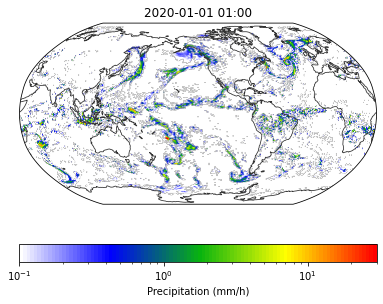

In [7]:
itime = 1
im = egh.healpix_show(ds.precipitation.isel(time=itime),norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/h)')

<Figure size 460.8x345.6 with 0 Axes>

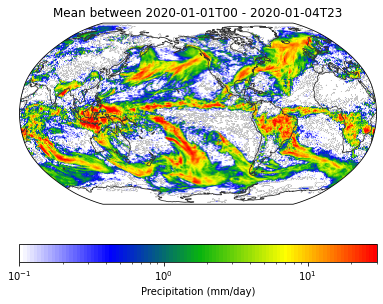

In [8]:
# time_str1 = '2019-06-01T00'
# time_str2 = '2019-08-31T23'
time_str1 = '2020-01-01T00'
time_str2 = '2020-01-04T23'
pcp_avg = ds.precipitation.sel(time=slice(time_str1, time_str2)).mean(dim='time') * 24
im = egh.healpix_show(pcp_avg,norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')

<Figure size 460.8x345.6 with 0 Axes>

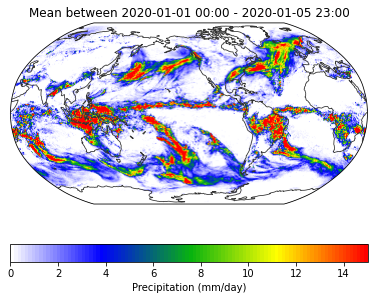

In [9]:
pcp_avg = ds.precipitation.mean(dim='time') * 24
im = egh.healpix_show(pcp_avg,norm=mpl.colors.Normalize(vmin=0, vmax=15), cmap=cmaps.WhBlGrYeRe)
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')